## Itô's Lemma Clearly Explained

### Traditional Derivatives

The derivative is defined as the following limit:

$\frac{d}{dx}f(x) = lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} = f'(x)$

Where using this definition we can prove a variety of rules for differentiating.

We need the derivative for all sorts of things including:
- identifying instantaneous rates of change
- solving differential equations
- solving optimization problems
- $\dots$

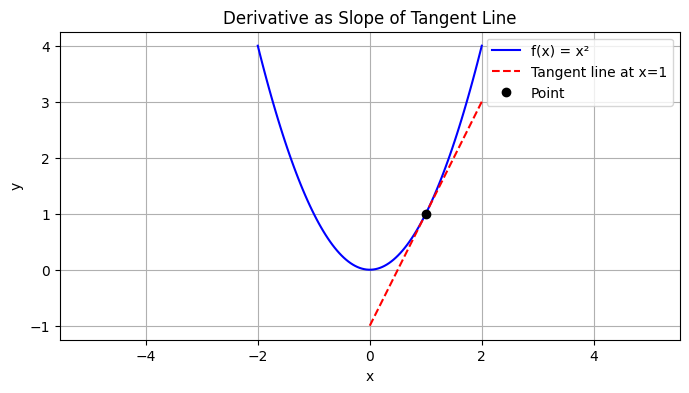

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot
def f(x):
    return x**2

# Create x values
x = np.linspace(-2, 2, 100)
y = f(x)

# Point where we want to show the derivative
x0 = 1
y0 = f(x0)

# Calculate derivative at x0
derivative = 2*x0  # For f(x)=x^2, derivative is 2x

# Create points for tangent line
dx = 1  # Length of tangent line
x_tangent = np.array([x0-dx, x0+dx])
y_tangent = y0 + derivative*(x_tangent - x0)

# Create plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='f(x) = x²')
plt.plot(x_tangent, y_tangent, 'r--', label=f'Tangent line at x={x0}')
plt.plot(x0, y0, 'ko', label='Point')

plt.grid(True)
plt.legend()
plt.title('Derivative as Slope of Tangent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


### Differentials

Let's simply consider a differential to be a small change in a variable

$d x = (x + \Delta x) - x$

as the change in x, $\Delta x \rightarrow 0$, it follows naturally $dx \rightarrow (x + 0) - x \rightarrow 0$, an infinitely small change, but not precisely zero!

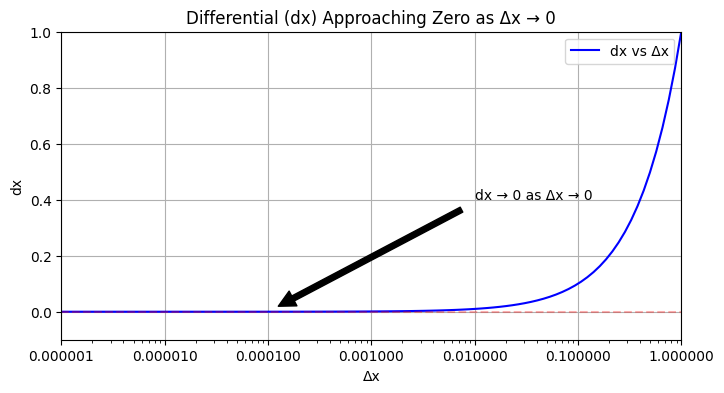

In [42]:
# Create x values for different deltas
deltas = np.logspace(-6, 0, 100)  # Creates 100 points from 10^-6 to 10^0
differentials = deltas  # In this simple case, differential equals delta

# Create plot
plt.figure(figsize=(8, 4))
plt.semilogx(deltas, differentials, 'b-', label='dx vs Δx')
plt.grid(True)
plt.title('Differential (dx) Approaching Zero as Δx → 0')
plt.xlabel('Δx')
plt.ylabel('dx')

# Add reference line at y=0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# Set axis limits to show approach to y-axis
plt.xlim(1e-6, 1)
plt.ylim(-0.1, 1)

# Add annotation
plt.annotate('dx → 0 as Δx → 0', 
            xy=(1e-4, 1e-4),
            xytext=(1e-2, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.legend()
# Format x-axis to use decimal notation instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.6f'))
plt.show()


### Taylor Series

The Taylor expansion of $f(x)$ is given by

$f(x + dx) = f(x) + f'(x)dx + \frac{1}{2}f''(x)(dx)^2 + ...$

Using the definition of the derivative

$f'(x) = lim_{dx \rightarrow 0} \frac{f(x + dx) - f(x)}{dx}$, we can substitute in the Taylor expansion!

$\implies f'(x) = lim_{dx \rightarrow 0} \frac{f(x) + f'(x)dx + \frac{1}{2}f''(x)(dx)^2 + ... - f(x)}{dx}$

$\implies f'(x) = lim_{dx \rightarrow 0} \frac{f'(x)dx + \frac{1}{2}f''(x)(dx)^2 + ...}{dx}$

$\implies f'(x) = lim_{dx \rightarrow 0} f'(x) + \frac{1}{2}f''(x)(dx) + ... = f'(x)$

Using the definition of a derivative, we can see higher-order terms become negligible as the change in x goes to zero ($dx \rightarrow 0$).

It's easy to *say* this, but let's see it in action!

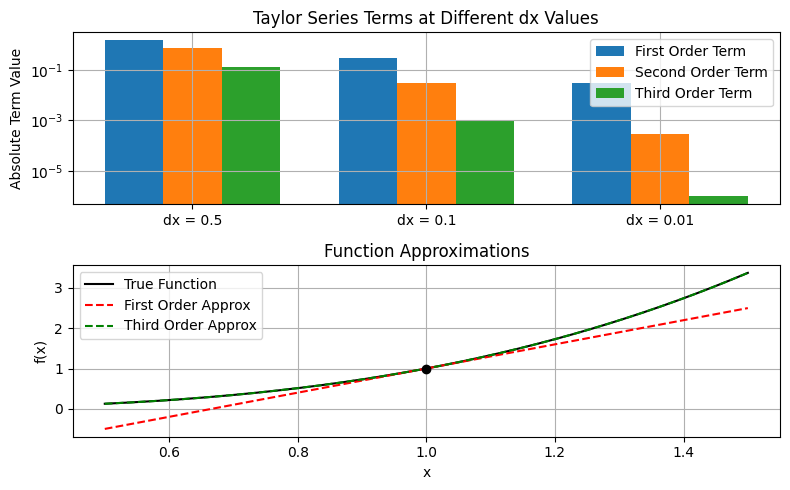

In [59]:
# Define a function and its derivatives
def f(x):
    return x**3  # Example function: f(x) = x^3

def f_prime(x):
    return 3*x**2   # f'(x) = 3x^2

def f_double_prime(x):
    return 6*x     # f''(x) = 6x

def f_triple_prime(x):
    return 6     # f'''(x) = 6

# Point to evaluate at
x0 = 1.0

# Create different dx values
dx_values = [0.5, 0.1, 0.01]

# Calculate terms for each dx
first_terms = []
second_terms = []
third_terms = []

for dx in dx_values:
    # First order term
    first = f_prime(x0) * dx
    first_terms.append(abs(first))
    
    # Second order term
    second = (f_double_prime(x0) * dx**2) / 2
    second_terms.append(abs(second))
    
    # Third order term
    third = (f_triple_prime(x0) * dx**3) / 6
    third_terms.append(abs(third))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Bar chart of terms
x = np.arange(len(dx_values))
width = 0.25

ax1.bar(x - width, first_terms, width, label='First Order Term')
ax1.bar(x, second_terms, width, label='Second Order Term')
ax1.bar(x + width, third_terms, width, label='Third Order Term')

ax1.set_xticks(x)
ax1.set_xticklabels([f'dx = {dx}' for dx in dx_values])
ax1.set_yscale('log')
ax1.set_ylabel('Absolute Term Value')
ax1.set_title('Taylor Series Terms at Different dx Values')
ax1.legend()
ax1.grid(True)

# Plot actual function and approximations
x_plot = np.linspace(x0-0.5, x0+0.5, 1000)
y_true = f(x_plot)
y_first_order = f(x0) + f_prime(x0)*(x_plot - x0)
y_third_order = (f(x0) + f_prime(x0)*(x_plot - x0) + 
                 (f_double_prime(x0)*(x_plot - x0)**2)/2 + 
                 (f_triple_prime(x0)*(x_plot - x0)**3)/6)

ax2.plot(x_plot, y_true, 'k-', label='True Function')
ax2.plot(x_plot, y_first_order, 'r--', label='First Order Approx')
ax2.plot(x_plot, y_third_order, 'g--', label='Third Order Approx')
ax2.plot(x0, f(x0), 'ko')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Function Approximations')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In the case above we are dealing with a *deterministic* function, there is no randomness in the differentials!

When we have a time dependent function of a stochastic process (all that means is that it is a function of a random process over time)

$f(t, X_t)$ where $X_t$ can be Brownian motion, geometric Brownian motion, or any stochastic process...

**all** of these higher-order terms don't drop out - we need a correction term (Itô's Lemma)!

---

### Making the Rules from Stochastic Calculus Intuitive

Typically, we deal with a Brownian motion $W_t$, and it can easily be shown:

- $(dt)^2 \rightarrow 0$ as $dt \rightarrow 0$ because $dt$ acts like the higher-order differentials above!

- $dt dW_t \rightarrow  0$ as $dt \rightarrow 0$ becase $dt$ will go to zero and drag $dW_t$ to zero too!

The *big* difference:
- $(dW_t)^2 \rightarrow  dt$ which says something about the quadratic variation, the variance, of $W_t$

**Less Formal, More Intuitive**

$W_{t + \Delta t} - W_t \sim N(0, \Delta t)$, increments in Brownian motion are normal scaled by the time step by *def(n)*

As the increment approaches zero we can call it a differential:

$$\Delta t \rightarrow 0 \implies dW_t \sim N(0, dt)$$

---

**More Formally**

If we have a Brownian motion on the interval $[0, T]$ (discretely partitioned by $N$) we require by definition

$W_T - W_0 \sim N(0, \Delta t) = N(0, T)$

If $(dW_t)^2 = 0$ like in the ordinary differentials, it would follow the variance would be 

$$Var(W_T - W_0) = \mathbb{E}[\sum_{i=1}^N (dW_{t_i})^2] - (\mathbb{E}[dW_{t_i}])^2$$

by the variance formula, but Brownian motion is mean zero so both terms go to zero

$$\implies Var(W_T - W_0) = 0 + 0 = 0 \not \sim N(0, T)$$

### Itô's Lemma

Consider a time dependent function of Brownian motion $f(t, W_t)$, we can apply the Taylor expansion to get:

$$df = \frac{\delta f}{\delta t}dt + \frac{\delta f}{\delta W_t} dW_t + \frac{1}{2}\frac{\delta^2 f}{\delta t^2} (dt)^2 + \frac{1}{2}\frac{\delta^2 f}{\delta W_t^2} (dW_t)^2 + \frac{1}{2} \frac{\delta^2 f}{\delta t \delta W_t}dt dW_t + \dots$$

**Notice** we can easily apply the rules from stochastic calculus above!

$(dt)^2 \rightarrow 0 \implies \frac{1}{2}\frac{\delta^2 f}{\delta t^2} (dt)^2 = 0$

$(dW_t)^2 \rightarrow dt \implies \frac{1}{2}\frac{\delta^2 f}{\delta W_t^2} (dW_t)^2 =  \frac{1}{2}\frac{\delta^2 f}{\delta W_t^2} dt$

$dtdW_t \rightarrow 0 \implies \frac{1}{2} \frac{\delta^2 f}{\delta t \delta W_t}dt dW_t =   0 $

**Big Idea:**

And higher order terms will always include a $dt$ either from the cross-term or the Brownian motion $(dW_t)^2$ meaning anything beyond this is zero!

We can then reduce $df$ to the following

$$\implies df = \frac{\delta f}{\delta t}dt + \frac{\delta f}{\delta W_t} dW_t + \frac{1}{2}\frac{\delta^2 f}{\delta W_t^2} dt$$

$$\implies df = (\frac{\delta f}{\delta t} + \frac{1}{2}\frac{\delta^2 f}{\delta W_t^2})dt + \frac{\delta f}{\delta W_t} dW_t$$

### Example:

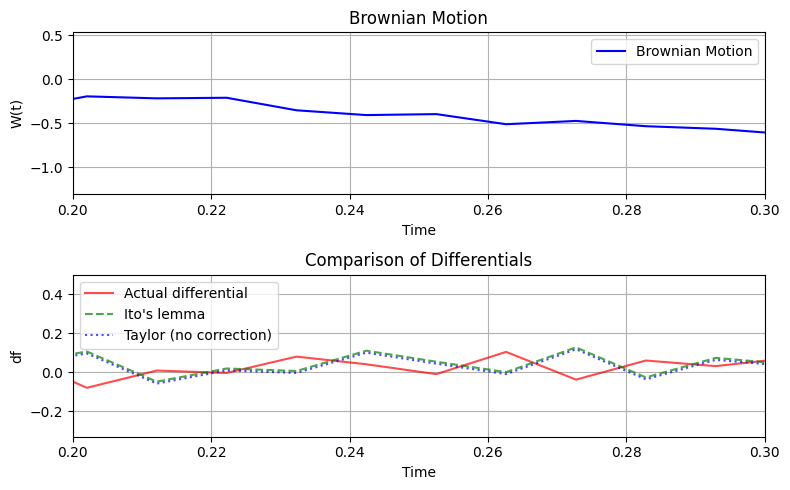

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 1.0  # Total time
N = 100  # Number of steps
dt = T/N  # Time step
t = np.linspace(0, T, N)

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), N)
W = np.cumsum(dW)

# Function f(t,W) = W^2
f = W**2

# Compute differentials using Ito's lemma
# df = 2W dW + dt (Ito's lemma with correction term)
df_ito = 2*W*dW + dt

# Compute Taylor differential without correction term
# df = 2W dW (standard Taylor expansion)
df_taylor = 2*W*dW

# Compute actual differential
df_actual = np.diff(f)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Plot Brownian motion
ax1.plot(t, W, 'b-', label='Brownian Motion')
ax1.set_title('Brownian Motion')
ax1.set_xlabel('Time')
ax1.set_ylabel('W(t)')
ax1.grid(True)
ax1.legend()
# Zoom in to time interval [0.2, 0.3]
ax1.set_xlim(0.2, 0.3)

# Plot differentials
ax2.plot(t[1:], df_actual, 'r-', label='Actual differential', alpha=0.7)
ax2.plot(t[1:], df_ito[:-1], 'g--', label="Ito's lemma", alpha=0.7)
ax2.plot(t[1:], df_taylor[:-1], 'b:', label='Taylor (no correction)', alpha=0.7)
ax2.set_title("Comparison of Differentials")
ax2.set_xlabel('Time')
ax2.set_ylabel('df')
ax2.grid(True)
ax2.legend()
# Zoom in to same time interval for comparison
ax2.set_xlim(0.2, 0.3)

plt.tight_layout()
plt.show()

*What the heck?* I thought we corrected the differential using Itô's Lemma?

We sure did, and the red line is **one sample path** of the differential!  

Itô's Lemma will correctly predict the expected value and variance of the processes evolution - not a single sample path's evolution!

---

### Simulating Itô's Lemma v. Taylor Series to Assess the Efficacy of the Differentials

When we consider the average *actual* differential of the Brownian motion we can compare the two differentials given by 

-Itô's Lemmathe

- Taylor series

We can see that the Itô's Lemma differential corrects the Taylor series and converges the the actual differential by the Law of Large Numbers (LLN)!

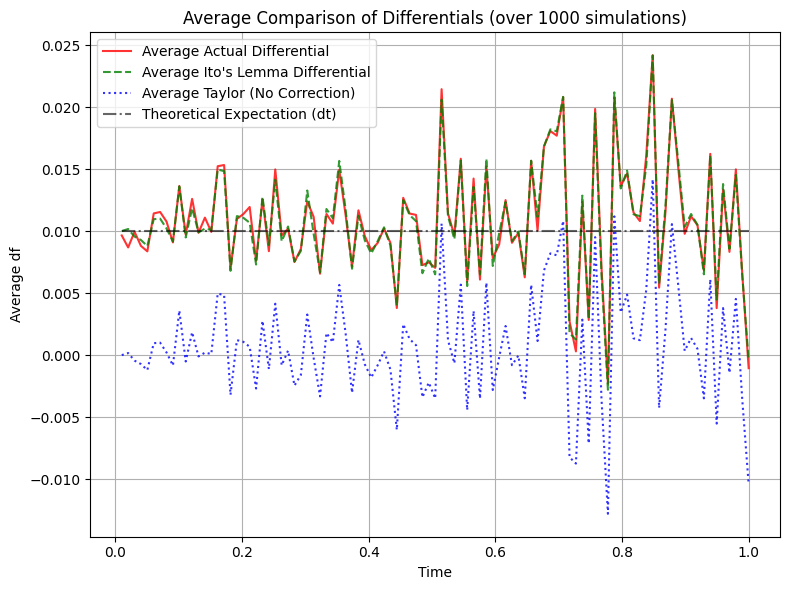


--- Insights from Averages ---
Observe how the 'Average Actual Differential' and 'Average Ito's Lemma Differential'
closely match the 'Theoretical Expectation (dt)' line. This confirms that Itô's Lemma
correctly captures the average (expected) change of the function, while the Taylor
expansion without the correction does not.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
T = 1.0  # Total time
N = 100  # Number of steps
dt = T / N  # Time step
t = np.linspace(0, T, N)

# Number of simulations to average over
num_simulations = 1000 # Increased for better averaging

# Initialize arrays to store sums for averaging
sum_df_ito = np.zeros(N)
sum_df_taylor = np.zeros(N)
sum_df_actual = np.zeros(N-1) # Actual differential has N-1 points

# Run multiple simulations
for _ in range(num_simulations):
    # Simulate Brownian motion
    dW = np.random.normal(0, np.sqrt(dt), N)
    # W needs to be simulated with an initial value, typically W_0 = 0
    W = np.insert(np.cumsum(dW[:-1]), 0, 0) # W_0=0, then cumulative sum up to N-1
                                           # This makes W and dW consistent for the differential calculation
    
    # Function f(W) = W^2 (note: your original f=W^2 had N points, but dW had N points.
    # To align them for 2*W*dW, W needs to be the 'left' value.)
    f_val = W**2 # f(W_t)

    # Compute differentials using Ito's lemma
    # df = 2W dW + dt
    df_ito_single_path = 2 * W[:-1] * dW[:-1] + dt # Use W_t and dW_t

    # Compute Taylor differential without correction term
    # df = 2W dW
    df_taylor_single_path = 2 * W[:-1] * dW[:-1]

    # Compute actual differential (f(t+dt) - f(t))
    df_actual_single_path = np.diff(f_val)

    # Accumulate for averaging
    sum_df_ito += np.pad(df_ito_single_path, (0,1), 'constant', constant_values=0) # Pad with 0 to match size
    sum_df_taylor += np.pad(df_taylor_single_path, (0,1), 'constant', constant_values=0) # Pad with 0 to match size
    sum_df_actual += df_actual_single_path


# Calculate averages
avg_df_ito = sum_df_ito / num_simulations
avg_df_taylor = sum_df_taylor / num_simulations
avg_df_actual = sum_df_actual / num_simulations


# Plotting the Averages
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t[1:], avg_df_actual, 'r-', label='Average Actual Differential', alpha=0.8)
ax.plot(t[1:], avg_df_ito[:-1], 'g--', label="Average Ito's Lemma Differential", alpha=0.8)
ax.plot(t[1:], avg_df_taylor[:-1], 'b:', label='Average Taylor (No Correction)', alpha=0.8)

# Overlay the expected value of df_actual for W_t^2, which is just dt
# E[d(W_t^2)] = E[dt + 2W_t dW_t] = dt + 2 E[W_t]E[dW_t] (since W_t and dW_t are independent and E[dW_t]=0)
# E[d(W_t^2)] = dt
ax.plot(t[1:], np.full_like(t[1:], dt), 'k-.', label='Theoretical Expectation (dt)', alpha=0.6)


ax.set_title(f"Average Comparison of Differentials (over {num_simulations} simulations)")
ax.set_xlabel('Time')
ax.set_ylabel('Average df')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

print("\n--- Insights from Averages ---")
print("Observe how the 'Average Actual Differential' and 'Average Ito's Lemma Differential'")
print("closely match the 'Theoretical Expectation (dt)' line. This confirms that Itô's Lemma")
print("correctly captures the average (expected) change of the function, while the Taylor")
print("expansion without the correction does not.")

---

### Closing Thoughts

Integral to stochastic calculus Itô's Lemma shows that we must add a "correction term" when considering the differential of a time dependent function of a stochastic process.  

This is incredibly necessary especially when considering stochastic differential equations for pricing and other relevant models!

Many tend to mistaken the lemma for predicting the sample path difference when in reality the lemma predicts the expected value and variance of the stochastic process' evolution as seen in the second chart!

With this we can begin to tackle solutions to stochastic differential equations!